# Colossus tutorial: MCMC fitting

Colossus includes a basic MCMC fitting module based on the Goodman & Weare 2010 algorithm, contributed by Andrey Kravtsov. 

In [1]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First, we need to define a likelihood function which we are trying to maximize. For a quick demonstration, let's use a double Gaussian with correlated parameters:

In [2]:
def likelihood(x):

    sig1 = 1.0
    sig2 = 2.0
    r = 0.95
    r2 = r * r
    res = np.exp(-0.5 * ((x[:, 0] / sig1)**2 + (x[:, 1] / sig2)**2 - 2.0 * r * x[:, 0] * x[:, 1] \
            / (sig1 * sig2)) / (1.0 - r2)) / (2 * np.pi * sig1 * sig2) / np.sqrt(1.0 - r2)

    return res

Running the MCMC is easy now: we need to decide on an initial guess for the parameters and a number of "walkers" (chains run in parallel). Running this code should take less than a minute on a modern laptop. The runChain() function takes more optional arguments than shown in the code below. By default, the MCMC is stopped when the Gelman-Rubin criterion is below a certain number in all parameters.

In [3]:
from colossus.utils import mcmc

param_names = ['x1', 'x2']
n_params = len(param_names)
x_initial = np.ones((n_params), np.float)
walkers = mcmc.initWalkers(x_initial, nwalkers = 200, random_seed = 156)
chain_thin, chain_full, _ = mcmc.runChain(likelihood, walkers)

Running MCMC with the following settings:
Number of parameters:                      2
Number of walkers:                       200
Save conv. indicators every:             100
Finish when Gelman-Rubin less than:   0.0100
-------------------------------------------------------------------------------------
Step    100, autocorr. time  28.7, GR = [  1.318  1.323]
Step    200, autocorr. time  51.1, GR = [  1.131  1.138]
Step    300, autocorr. time  51.7, GR = [  1.086  1.090]
Step    400, autocorr. time  52.7, GR = [  1.063  1.068]
Step    500, autocorr. time  50.8, GR = [  1.049  1.055]
Step    600, autocorr. time  49.5, GR = [  1.040  1.046]
Step    700, autocorr. time  48.6, GR = [  1.035  1.039]
Step    800, autocorr. time  47.3, GR = [  1.033  1.037]
Step    900, autocorr. time  45.9, GR = [  1.029  1.033]
Step   1000, autocorr. time  44.7, GR = [  1.025  1.028]
Step   1100, autocorr. time  42.0, GR = [  1.023  1.026]
Step   1200, autocorr. time  41.7, GR = [  1.021  1.023]
Step   1

Given the chain output, we can now compute the most likely values for the parameters as well as confidence intervals. We use the thinned chain for this purpose because the full chain's individual samples are highly correlated, leading to erroneous statistical inferences.

In [4]:
mcmc.analyzeChain(chain_thin, param_names = param_names);

-------------------------------------------------------------------------------------
Statistics for parameter %d, x1:
Mean:              -5.000e-03
Median:            -1.595e-02
Std. dev.:         +9.745e-01
68.3% interval:    -9.792e-01 .. +9.680e-01
95.5% interval:    -1.925e+00 .. +1.986e+00
99.7% interval:    -2.819e+00 .. +3.151e+00
-------------------------------------------------------------------------------------
Statistics for parameter %d, x2:
Mean:              -1.308e-02
Median:            -1.386e-02
Std. dev.:         +1.952e+00
68.3% interval:    -1.972e+00 .. +1.924e+00
95.5% interval:    -3.925e+00 .. +3.972e+00
99.7% interval:    -5.824e+00 .. +5.848e+00


The plotChain() function additionally creates a plot which elucidates the individual and joint likelihood distributions of the parameters:

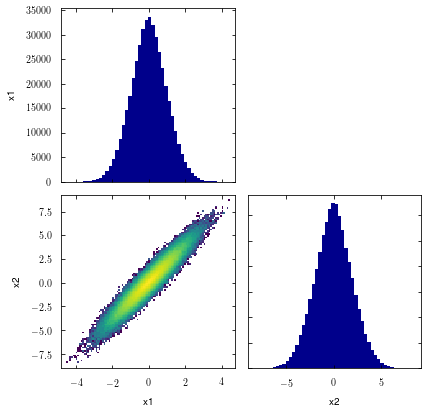

In [5]:
mcmc.plotChain(chain_full, param_names)
plt.show()